In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
(X_train,Y_train),(X_test,Y_test)=tf.keras.datasets.fashion_mnist.load_data()

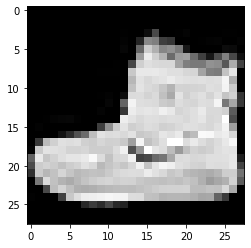

In [4]:
plt.imshow(X_train[0], cmap='gray')

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
Y_train.shape

(60000,)

In [8]:
Y_test.shape

(10000,)

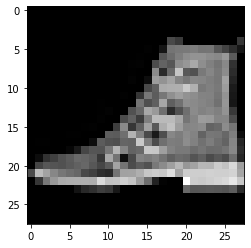

In [9]:
i = random.randint(1,60000)
plt.imshow(X_train[i] , cmap='gray')

In [10]:
label = Y_train[i]
label


9

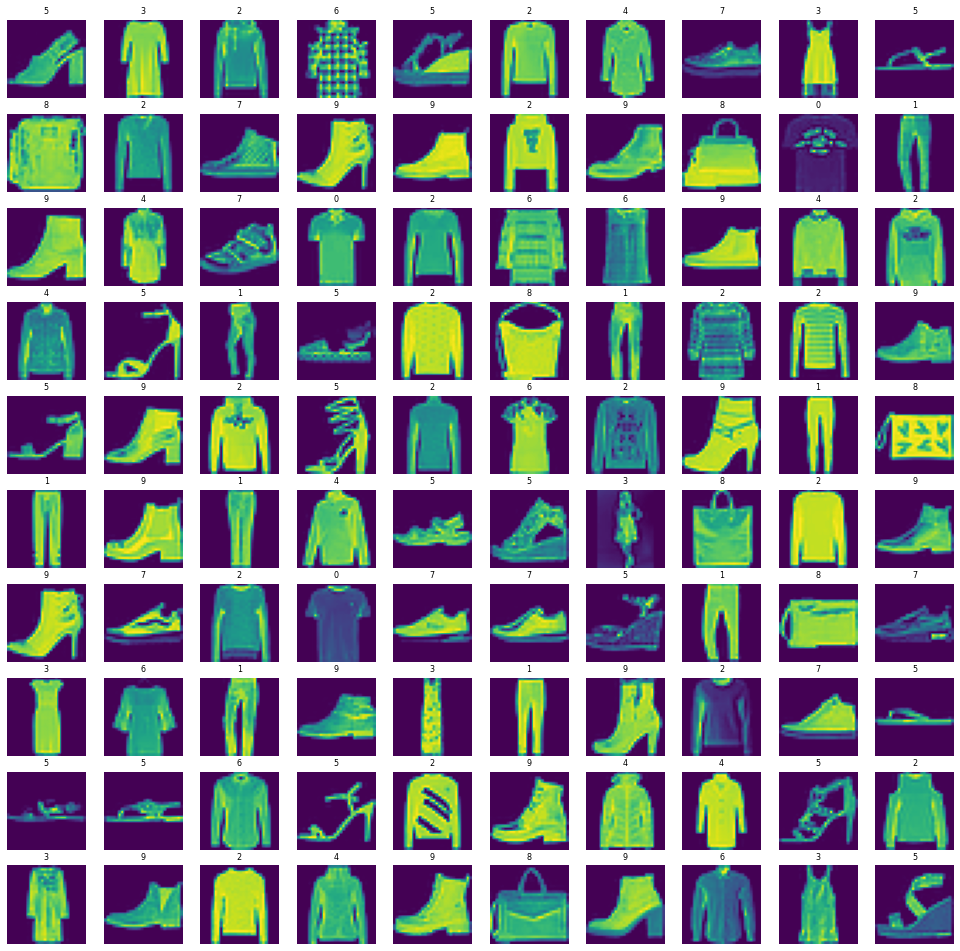

In [11]:
W_grid = 10
L_grid = 10
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel()
n_training = len(X_train)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(Y_train[index], fontsize = 8)
    axes[i].axis('off')

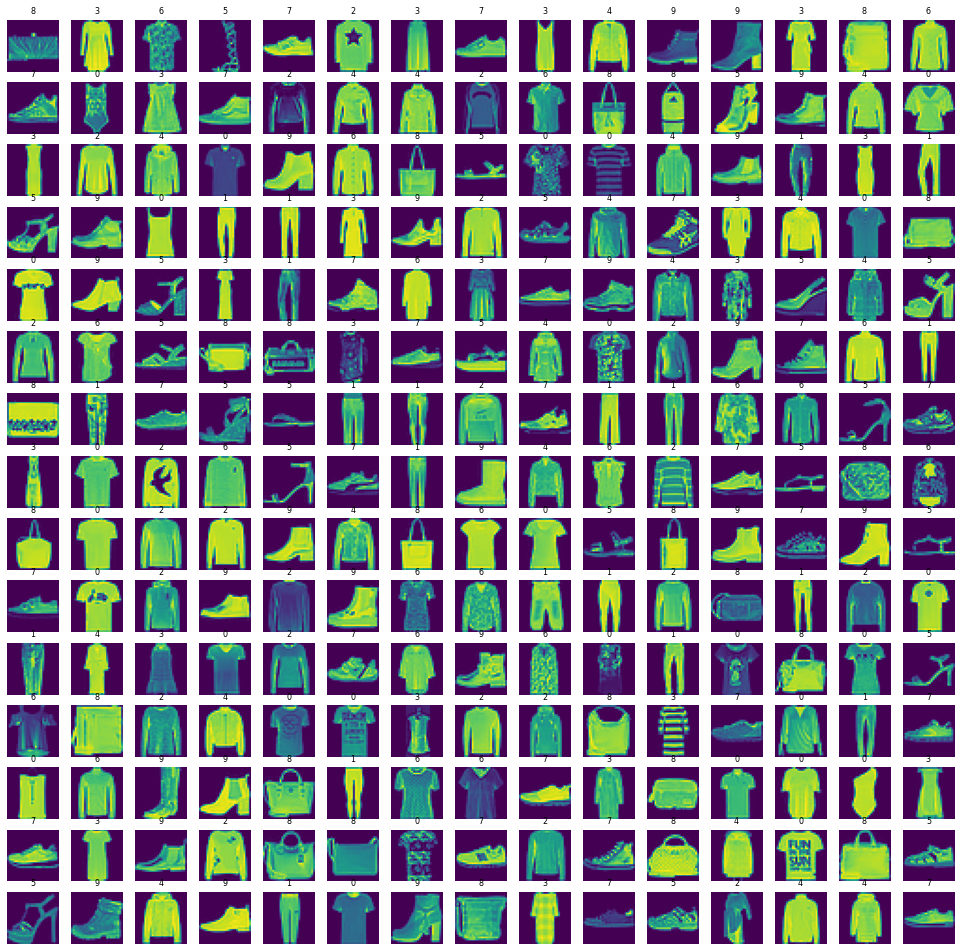

In [12]:
W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel()
n_training = len(X_train)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(Y_train[index], fontsize = 8)
    axes[i].axis('off')

In [13]:
X_train = X_train/255
X_test= X_test/255

In [14]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [15]:
X_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [16]:
noise_factor = 0.3

noise_dataset = []

for img in X_train:
    noisy_image = img+ noise_factor * np.random.rand (*img.shape)
    noisy_image =np.clip(noisy_image, 0, 1)
    noise_dataset.append(noisy_image)

In [17]:
noise_dataset = np.array(noise_dataset)

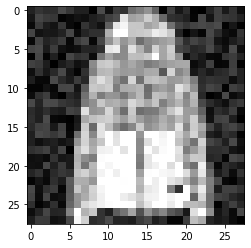

In [18]:
plt.imshow(noise_dataset[22] , cmap='gray')

In [19]:
noise_factor = 0.3

noise_test_dataset = []

for img in X_test:
    noisy_image = img+ noise_factor * np.random.rand (*img.shape)
    noisy_image =np.clip(noisy_image, 0, 1)
    noise_test_dataset.append(noisy_image)

In [20]:
noise_test_dataset = np.array(noise_test_dataset)

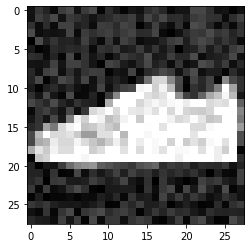

In [21]:
plt.imshow(noise_test_dataset[22] , cmap='gray')

In [22]:
autoencoder = tf.keras.models.Sequential()

autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, strides = 2, padding = 'same', input_shape = (28,28,1)))
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = 3, strides = 2, padding = 'same'))

autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = 3, strides = 1, padding = 'same'))


autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 16, kernel_size = 3, strides = 2, padding = 'same'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 1, kernel_size = 3, strides = 2, activation = 'sigmoid', padding = 'same'))


In [23]:
autoencoder.compile(loss='binary_crossentropy',optimizer = tf.keras.optimizers.Adam(lr = 0.001))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [24]:
 autoencoder.fit(noise_dataset.reshape(-1,28,28,1),
                X_train.reshape(-1,28,28,1),
                epochs=10,
                batch_size=200,
                validation_data = (noise_test_dataset.reshape(-1,28,28,1),X_test.reshape(-1,28,28,1)))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 28s 470us/sample - loss: 0.3912 - val_loss: 0.3115
Epoch 2/10
60000/60000 [==============================] - 27s 456us/sample - loss: 0.3007 - val_loss: 0.2968
Epoch 3/10
60000/60000 [==============================] - 28s 470us/sample - loss: 0.2910 - val_loss: 0.2898
Epoch 4/10
60000/60000 [==============================] - 29s 480us/sample - loss: 0.2851 - val_loss: 0.2849
Epoch 5/10
60000/60000 [==============================] - 29s 490us/sample - loss: 0.2812 - val_loss: 0.2819
Epoch 6/10
60000/60000 [==============================] - 30s 501us/sample - loss: 0.2788 - val_loss: 0.2800
Epoch 7/10
60000/60000 [==============================] - 29s 478us/sample - loss: 0.2770 - val_loss: 0.2784
Epoch 8/10
60000/60000 [==============================] - 29s 487us/sample - loss: 0.2757 - val_loss: 0.2773
Epoch 9/10
60000/60000 [==============================] - 29s 483us/sample - l

In [25]:
evaluation = autoencoder.evaluate(noise_test_dataset.reshape(-1,28,28,1), X_test.reshape(-1,28,28,1))
print('Test Accuracy : {:.3f}', format(evaluation))

10000/10000 [==============================] - 2s 222us/sample - loss: 0.2756
Test Accuracy : {:.3f} 0.2756028331756592


In [30]:
predicted = autoencoder.predict(noise_test_dataset[:10].reshape(-1,28,28,1))

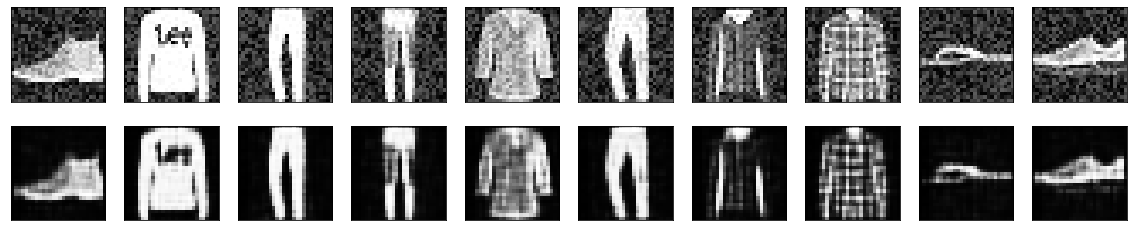

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True,figsize=(20,4))
for images, row in zip([noise_test_dataset[:10], predicted],axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28,28)),cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)